# <center>LAPTOP PRICE PREDICTOR</center>

# DATA UNDERSTANDING

In [113]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, \
                             ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [2]:
# load data
laptops_df = pd.read_csv("data/laptop_data.csv")

In [3]:
# display
laptops_df.sample(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
502,502,Lenovo,2 in 1 Convertible,13.9,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.4kg,85194.720
946,946,Dell,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics,Windows 10,1.36kg,78438.816
863,863,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,1TB HDD,Nvidia GeForce GTX 1050,No OS,2.5kg,54185.760
895,895,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.05kg,78588.000
1089,1089,Acer,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.4kg,20619.360


In [4]:
# shape of the data
laptops_df.shape

(1303, 12)

In [5]:
# duplicated values
laptops_df.duplicated().sum()

0

In [6]:
laptops_df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
# info
laptops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


# DATA PREPARATION

## DATA PREPROCESSING

In [8]:
# drop the unnamed column
laptops_df = laptops_df.drop("Unnamed: 0",axis = 1)

In [9]:
# display
laptops_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [10]:
# data shape
laptops_df.shape

(1303, 11)

**Ram Column : Remove GB & Convert it into Integer**

In [11]:
# doing this step to avoid nan value creation
laptops_df['Ram'] = laptops_df['Ram'].astype(str)

In [12]:
# remove GB & convert them into int
laptops_df['Ram'] = laptops_df['Ram'].str.replace("GB", "").astype(int)

In [13]:
laptops_df.tail()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [14]:
laptops_df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [15]:
laptops_df["Ram"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1303 entries, 0 to 1302
Series name: Ram
Non-Null Count  Dtype
--------------  -----
1303 non-null   int64
dtypes: int64(1)
memory usage: 10.3 KB


**Weight Column : Remove kg & Convert it into Float**

In [16]:
# convert them to strings
laptops_df["Weight"] = laptops_df["Weight"].astype(str)

In [17]:
# replace kg with "" & convert them to float
laptops_df["Weight"] = laptops_df["Weight"].str.replace("kg", "").astype(float)

In [18]:
laptops_df["Weight"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1303 entries, 0 to 1302
Series name: Weight
Non-Null Count  Dtype  
--------------  -----  
1303 non-null   float64
dtypes: float64(1)
memory usage: 10.3 KB


In [19]:
laptops_df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
77,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,128GB SSD + 1TB HDD,Intel UHD Graphics 620,Windows 10,2.02,45554.4000
1206,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.91,30849.1200
282,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.50,44169.1200
821,Toshiba,Ultrabook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.25,58075.2000
115,HP,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.26,74538.1872


## EDA

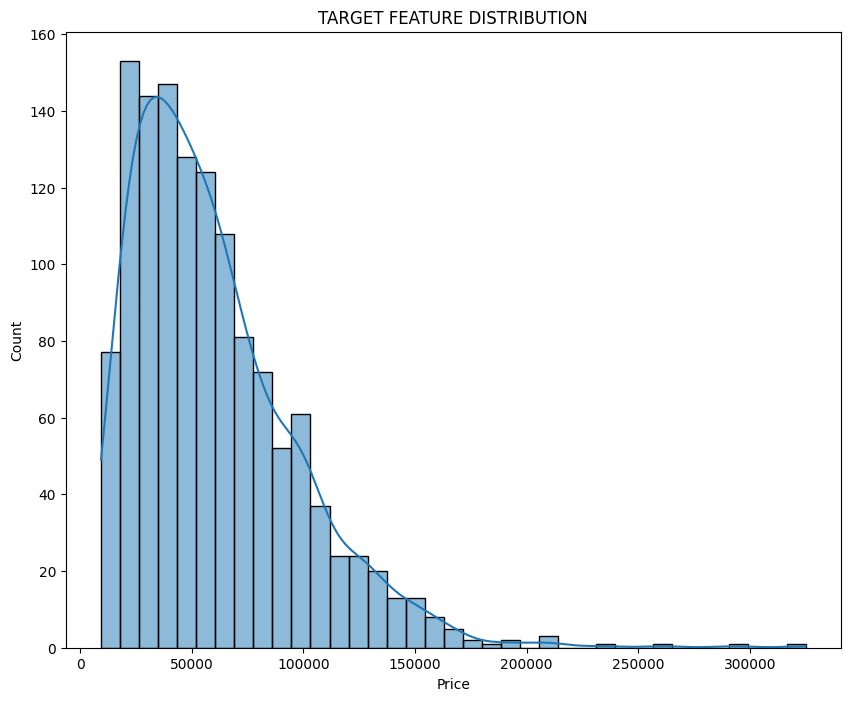

In [20]:
plt.figure(figsize=(10,8))
sns.histplot(laptops_df["Price"],kde=True)
plt.title("TARGET FEATURE DISTRIBUTION")
plt.show()

In [21]:
# skewness
laptops_df["Price"].skew()

1.5208655681688517

In [22]:
# kurtosis
laptops_df["Price"].kurtosis()

4.371086279272809

In [23]:
# laptop count brand wise
laptops_df["Company"].value_counts().sort_values(ascending = False)

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

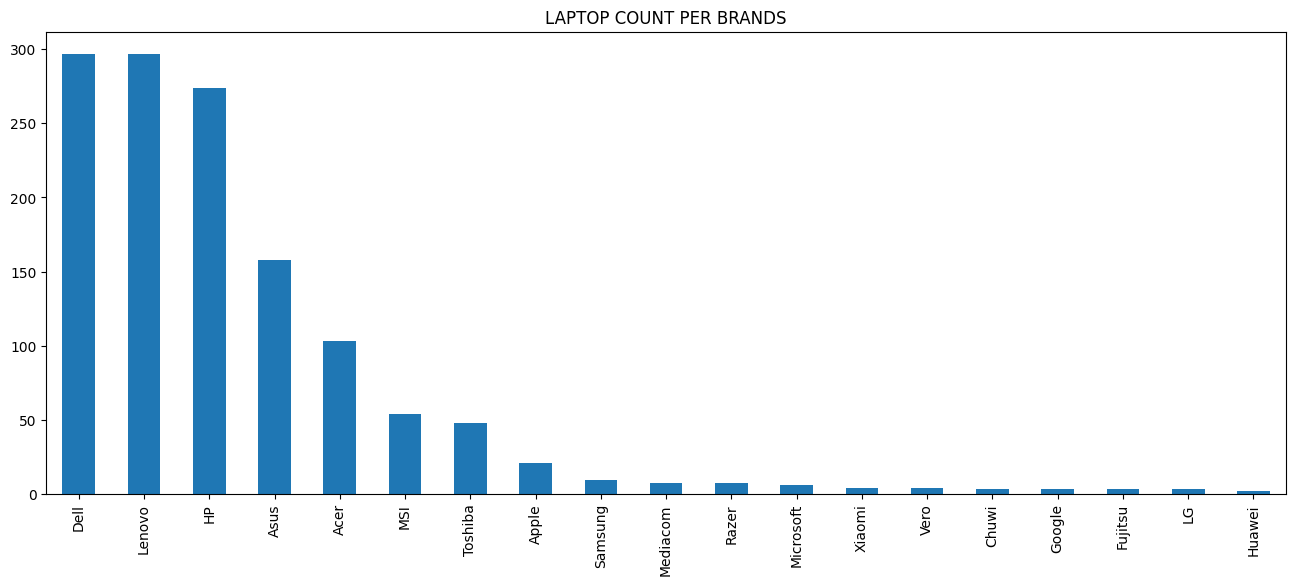

In [24]:
# plot laptop price brand wise
plt.figure(figsize=(16,6))
laptops_df["Company"].value_counts().sort_values(ascending = False).plot.bar(title="LAPTOP COUNT PER BRANDS")
plt.show()

In [25]:
# avg laptop price
laptops_avg_price_desc = laptops_df.groupby(["Company"]).mean("Price").sort_values("Price",ascending=False)
laptops_avg_price_desc 

,Inches,Ram,Weight,Price
Company,,,,
Razer,14.514286,19.428571,2.195714,178282.491429
LG,15.066667,10.666667,1.050000,111834.720000
MSI,16.442593,13.037037,2.660556,92116.226133
Google,12.300000,10.666667,1.100000,89386.080000
Microsoft,13.500000,8.000000,1.251333,85903.788000
Apple,13.247619,9.333333,1.320476,83340.499886
Huawei,13.000000,8.000000,1.050000,75870.720000
Samsung,13.822222,10.666667,1.315556,75308.320000
Toshiba,14.354167,8.666667,1.640208,67549.050000


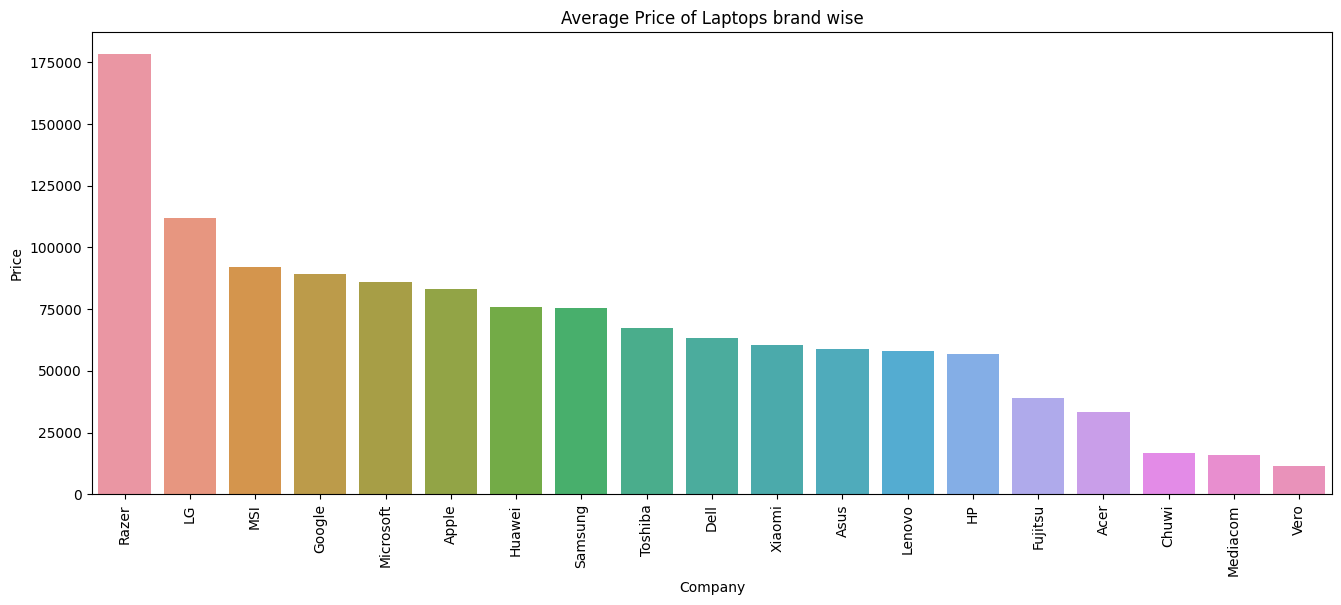

In [26]:
# check average price of the laptops brand wise
plt.figure(figsize=(16,6))
sns.barplot(data= laptops_avg_price_desc , x=laptops_avg_price_desc.index,y="Price")
plt.title("Average Price of Laptops brand wise")
plt.xticks(rotation=90)
plt.show()

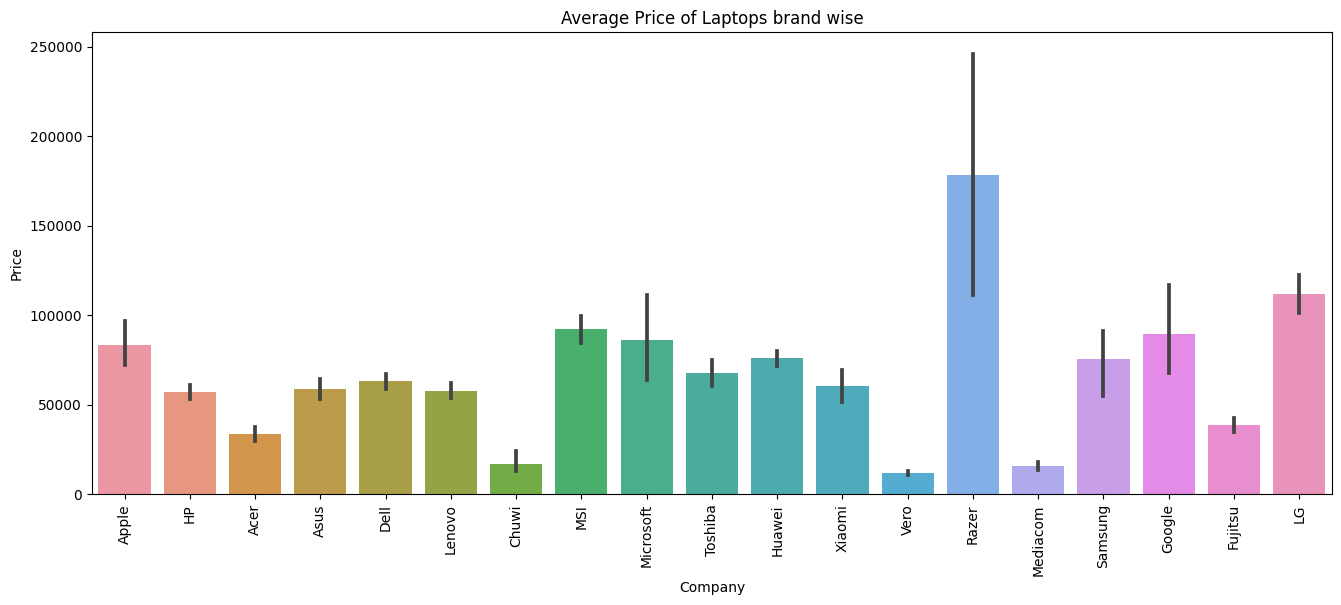

In [27]:
# check average value of the laptops brand wise
plt.figure(figsize=(16,6))
sns.barplot(data= laptops_df , x="Company",y="Price")
plt.title("Average Price of Laptops brand wise")
plt.xticks(rotation=90)
plt.show()

In [28]:
# type_name wise avg laptop price 
laptops_typename_df = laptops_df.groupby(["TypeName"]).mean("Price").sort_values("Price",ascending=False)
laptops_typename_df

,Inches,Ram,Weight,Price
TypeName,,,,
Workstation,15.951724,10.482759,2.466552,121497.525683
Gaming,16.345854,14.048780,2.949761,92247.960187
Ultrabook,13.601020,9.438776,1.343204,82489.713429
2 in 1 Convertible,13.614876,8.661157,1.546620,68326.360066
Notebook,15.330536,6.497937,2.059395,41669.149113
Netbook,11.816000,4.640000,1.306000,33898.440960


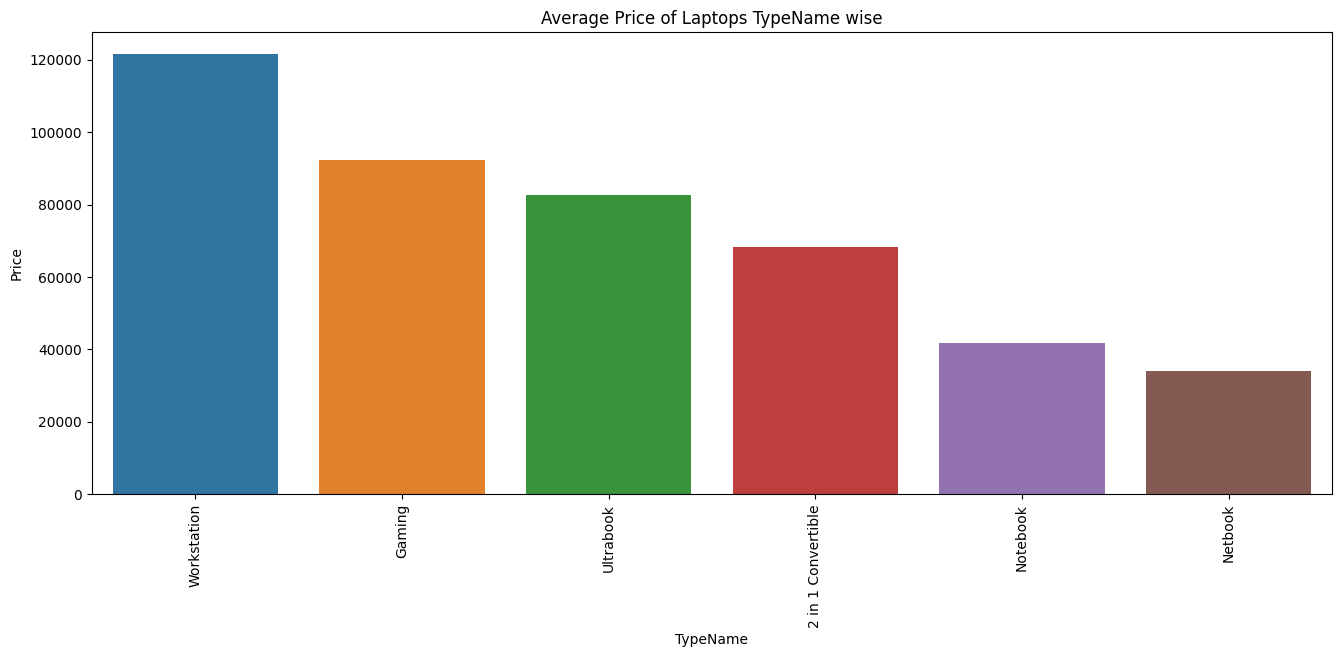

In [29]:
# check average value of the laptops type_name wise
plt.figure(figsize=(16,6))
sns.barplot(data= laptops_typename_df , x=laptops_typename_df.index,y="Price")
plt.title("Average Price of Laptops TypeName wise")
plt.xticks(rotation=90)
plt.show()

In [30]:
# unique screen size inches with their value counts
laptops_df["Inches"].value_counts()

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64

In [31]:
# unique screen_resolution size inches with their value counts
laptops_df["ScreenResolution"].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

## FEATURE ENGINEERING

#### Extracting Touchscreen Column from ScreenResolution Column

In [32]:
# Extracting Touchscreen Column from ScreenResolution Column
laptops_df["Touchscreen"] = laptops_df["ScreenResolution"].apply(lambda x: 1 if "Touchscreen" in x else 0)

In [33]:
# value counts of laptops with & without Touchscreen
laptops_df["Touchscreen"].value_counts()

0    1111
1     192
Name: Touchscreen, dtype: int64

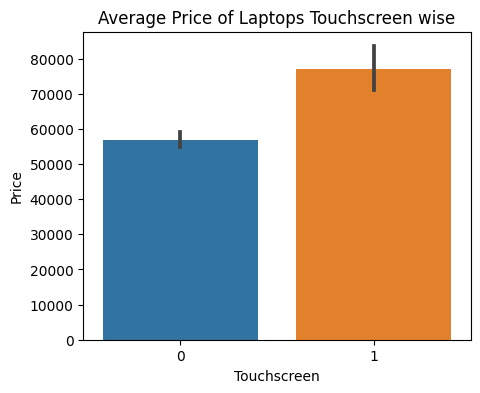

In [34]:
# effect of Touchscreen on laptop price on avg
plt.figure(figsize=(5,4))
sns.barplot(data= laptops_df , x="Touchscreen",y="Price")
plt.title("Average Price of Laptops Touchscreen wise")
plt.xticks(rotation = 0)
plt.show()

#### Extracting IPS column from ScreenResolution column

In [35]:
# Extracting IPS column from ScreenResolution column
laptops_df["IPS"] = laptops_df["ScreenResolution"].apply(lambda x : 1 if "IPS" in x else 0)

In [36]:
# value counts of laptops with or without IPS Panel
laptops_df["IPS"].value_counts()

0    938
1    365
Name: IPS, dtype: int64

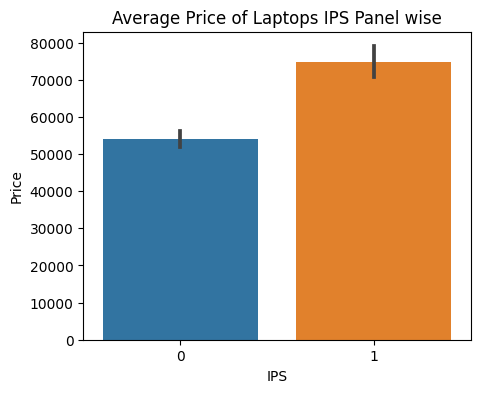

In [37]:
# effect of Touchscreen on laptop price on avg
plt.figure(figsize=(5,4))
sns.barplot(data= laptops_df , x="IPS",y="Price")
plt.title("Average Price of Laptops IPS Panel wise")
plt.xticks(rotation = 0)
plt.show()

#### Extracting X & Y resolution column from ScreenResolution

In [38]:
# Extracting X & Y resolution column from ScreenResolution
temp = laptops_df["ScreenResolution"].str.split("x",n=1,expand=True)
laptops_df[["X_res","Y_res"]] = temp

In [39]:
# display
laptops_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [40]:
laptops_df["X_res"].value_counts()   

Full HD 1920                                507
1366                                        281
IPS Panel Full HD 1920                      231
IPS Panel Full HD / Touchscreen 1920         53
Full HD / Touchscreen 1920                   47
1600                                         23
Touchscreen 1366                             16
Quad HD+ / Touchscreen 3200                  15
IPS Panel 4K Ultra HD 3840                   12
IPS Panel 4K Ultra HD / Touchscreen 3840     11
4K Ultra HD / Touchscreen 3840               10
4K Ultra HD 3840                              7
Touchscreen 2560                              7
IPS Panel 1366                                7
IPS Panel Quad HD+ / Touchscreen 3200         6
IPS Panel Retina Display 2560                 6
IPS Panel Retina Display 2304                 6
Touchscreen 2256                              6
IPS Panel Touchscreen 2560                    5
IPS Panel Retina Display 2880                 4
IPS Panel Touchscreen 1920              

In [41]:
laptops_df["Y_res"].value_counts() 

1080    841
768     308
2160     43
1800     31
1440     31
900      27
1600     10
1504      6
1200      5
1824      1
Name: Y_res, dtype: int64

Y_res column seems to be ok but need to take care of X_res columns since the resolutions are not properly extracted

In [42]:
# using regex to extract the resolution
laptops_df["X_res"].str.replace(",","").str.findall(r"(\d+\.?\d)").apply(lambda x : x[0])

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: X_res, Length: 1303, dtype: object

In [43]:
# using regex to extract the resolution
laptops_df["X_res"] = laptops_df["X_res"].str.replace(",","").str.findall(r"(\d+\.?\d)").apply(lambda x : x[0])

In [44]:
# display
laptops_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [45]:
# data type of X_res
laptops_df["X_res"].dtypes

dtype('O')

In [46]:
# data type of Y_res
laptops_df["Y_res"].dtypes

dtype('O')

Need to convert the dtype of X_res & Y_res from str to int

In [47]:
# convert the dtype of X_res & Y_res from str to int
laptops_df["X_res"] = laptops_df["X_res"].astype(int)
laptops_df["Y_res"] = laptops_df["Y_res"].astype(int)

In [48]:
# data type of X_res
laptops_df["X_res"].dtypes

dtype('int64')

In [49]:
# data type of Y_res
laptops_df["Y_res"].dtypes

dtype('int64')

In [50]:
# check correlation of X_res & Y_res
laptops_df.corr()["Price"].sort_values(ascending = False)

/var/folders/kl/b_7s360d6_95c12zywr6p0000000gn/T/ipykernel_14219/3306321999.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  laptops_df.corr()["Price"].sort_values(ascending = False)


Price          1.000000
Ram            0.743007
X_res          0.556529
Y_res          0.552809
IPS            0.252208
Weight         0.210370
Touchscreen    0.191226
Inches         0.068197
Name: Price, dtype: float64

#### Creating PPI column from X_res, Y_res & Inches column

In [51]:
laptops_df["PPI"] = np.sqrt((laptops_df["X_res"] ** 2) + (laptops_df["Y_res"] ** 2))/laptops_df["Inches"]
laptops_df["PPI"].astype(float)
laptops_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


Let's drop ScreenResolution column since we have created the required columns needed from it.

In [52]:
# drop ScreenResolution column
laptops_df = laptops_df.drop("ScreenResolution",axis=1)
laptops_df.head(2)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940


Let's drop X_res, Y_res, & Inches since we have used them and created PPI column, to avoid multi-colinearity.

In [53]:
# drop Inches, X_res, Y_res column
laptops_df = laptops_df.drop(["Inches","X_res","Y_res"],axis=1)
laptops_df.head(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940


Let's Feature Engineer Cpu column.

In [54]:
# unique values of Cpu column
laptops_df["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [55]:
# split Cpu column
laptops_df["Cpu"].str.split()

0                         [Intel, Core, i5, 2.3GHz]
1                         [Intel, Core, i5, 1.8GHz]
2                  [Intel, Core, i5, 7200U, 2.5GHz]
3                         [Intel, Core, i7, 2.7GHz]
4                         [Intel, Core, i5, 3.1GHz]
                           ...                     
1298               [Intel, Core, i7, 6500U, 2.5GHz]
1299               [Intel, Core, i7, 6500U, 2.5GHz]
1300    [Intel, Celeron, Dual, Core, N3050, 1.6GHz]
1301               [Intel, Core, i7, 6500U, 2.5GHz]
1302    [Intel, Celeron, Dual, Core, N3050, 1.6GHz]
Name: Cpu, Length: 1303, dtype: object

In [56]:
laptops_df["Cpu"].apply(lambda x : " ".join(x.split()[:3]))

0            Intel Core i5
1            Intel Core i5
2            Intel Core i5
3            Intel Core i7
4            Intel Core i5
               ...        
1298         Intel Core i7
1299         Intel Core i7
1300    Intel Celeron Dual
1301         Intel Core i7
1302    Intel Celeron Dual
Name: Cpu, Length: 1303, dtype: object

In [57]:
# create new column, Cpu Names
laptops_df["Cpu Names"] = laptops_df["Cpu"].apply(lambda x : " ".join(x.split()[:3]))

In [58]:
laptops_df.head(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Names
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5


Let's create CPU Brand column from Cpu Names. 

In [59]:
# function to extract cpu brands & types
def extract_brand(text):
    if text == "Intel Core i7" or text == "Intel Core i5" or text == "Intel Core i3":
        return text
    else:
        if text == "Intel":
            return "Other Intel Processor"
        else:
            return "AMD Processor"


In [60]:
# apply the extract brand function
laptops_df["Cpu Names"].apply(extract_brand)

0       Intel Core i5
1       Intel Core i5
2       Intel Core i5
3       Intel Core i7
4       Intel Core i5
            ...      
1298    Intel Core i7
1299    Intel Core i7
1300    AMD Processor
1301    Intel Core i7
1302    AMD Processor
Name: Cpu Names, Length: 1303, dtype: object

In [61]:
# create Cpu Brand column
laptops_df["Cpu Brand"] = laptops_df["Cpu Names"].apply(extract_brand)

In [62]:
laptops_df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Names,Cpu Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


In [63]:
laptops_df["Cpu Brand"].value_counts().sort_values(ascending=False)

Intel Core i7    527
Intel Core i5    423
AMD Processor    217
Intel Core i3    136
Name: Cpu Brand, dtype: int64

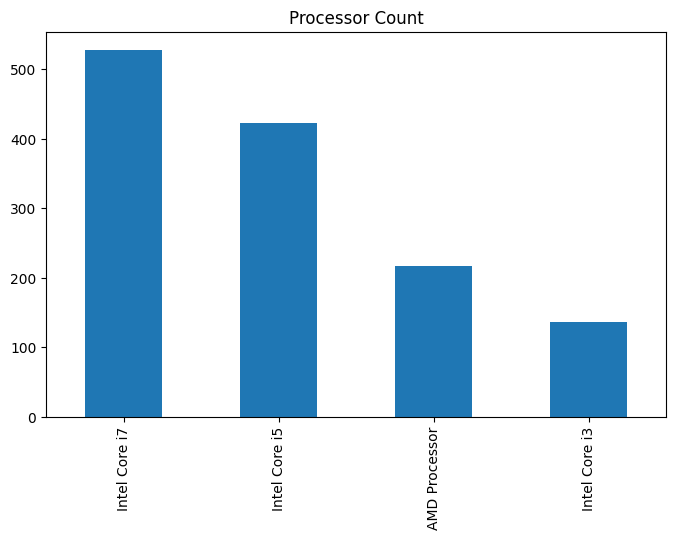

In [64]:
plt.figure(figsize=(8,5))
laptops_df["Cpu Brand"].value_counts().sort_values(ascending=False).plot.bar()
plt.title("Processor Count")
plt.show()

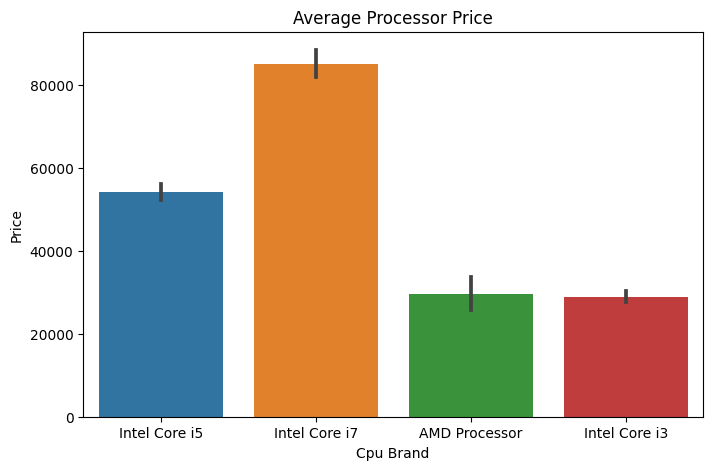

In [65]:
plt.figure(figsize=(8,5))
sns.barplot(data=laptops_df,x="Cpu Brand", y="Price")
plt.title("Average Processor Price")
plt.show()

Let's drop Cpu & Cpu Names column since relevant features are already extracted from it.

In [66]:
laptops_df = laptops_df.drop(["Cpu","Cpu Names"], axis = 1)

In [67]:
laptops_df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


Let's Focus on Ram column.

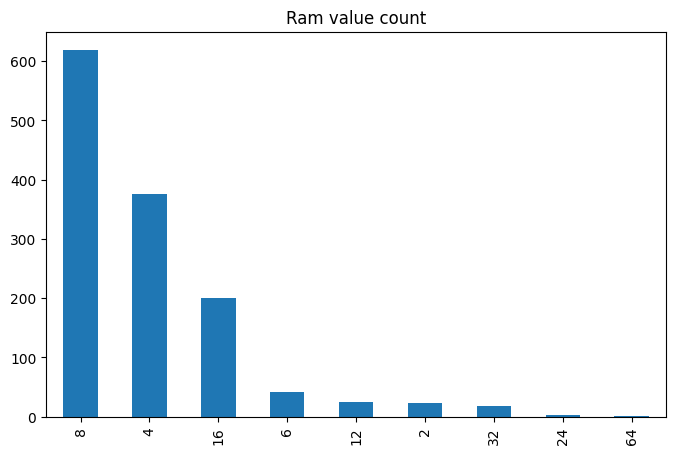

In [68]:
plt.figure(figsize=(8,5))
laptops_df["Ram"].value_counts().sort_values(ascending=False).plot.bar()
plt.title("Ram value count")
plt.show()

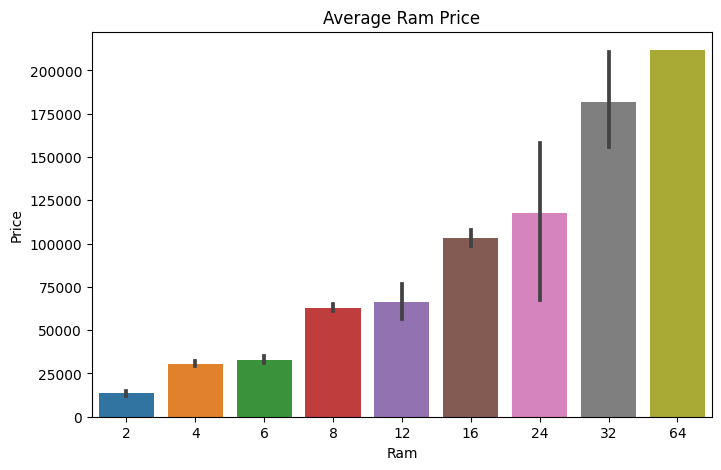

In [69]:
plt.figure(figsize=(8,5))
sns.barplot(data=laptops_df,x="Ram", y="Price")
plt.title("Average Ram Price")
plt.show()

In [70]:
laptops_df['Memory'] = laptops_df['Memory'].astype(str).replace('\.0', '', regex=True)
laptops_df["Memory"] = laptops_df["Memory"].str.replace('GB', '')
laptops_df["Memory"] = laptops_df["Memory"].str.replace('TB', '000')
new = laptops_df["Memory"].str.split("+", n = 1, expand = True)

laptops_df["first"]= new[0]
laptops_df["first"]=laptops_df["first"].str.strip()

laptops_df["second"]= new[1]

laptops_df["Layer1HDD"] = laptops_df["first"].apply(lambda x: 1 if "HDD" in x else 0)
laptops_df["Layer1SSD"] = laptops_df["first"].apply(lambda x: 1 if "SSD" in x else 0)
laptops_df["Layer1Hybrid"] = laptops_df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptops_df["Layer1Flash_Storage"] = laptops_df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

laptops_df['first'] = laptops_df['first'].str.replace(r'\D', '')

laptops_df["second"].fillna("0", inplace = True)

laptops_df["Layer2HDD"] = laptops_df["second"].apply(lambda x: 1 if "HDD" in x else 0)
laptops_df["Layer2SSD"] = laptops_df["second"].apply(lambda x: 1 if "SSD" in x else 0)
laptops_df["Layer2Hybrid"] = laptops_df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptops_df["Layer2Flash_Storage"] = laptops_df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

laptops_df['second'] = laptops_df['second'].str.replace(r'\D', '')

laptops_df["first"] = laptops_df["first"].astype(int)
laptops_df["second"] = laptops_df["second"].astype(int)

laptops_df["HDD"]=(laptops_df["first"]*laptops_df["Layer1HDD"]+laptops_df["second"]*laptops_df["Layer2HDD"])
laptops_df["SSD"]=(laptops_df["first"]*laptops_df["Layer1SSD"]+laptops_df["second"]*laptops_df["Layer2SSD"])
laptops_df["Hybrid"]=(laptops_df["first"]*laptops_df["Layer1Hybrid"]+laptops_df["second"]*laptops_df["Layer2Hybrid"])
laptops_df["Flash_Storage"]=(laptops_df["first"]*laptops_df["Layer1Flash_Storage"]+laptops_df["second"]*laptops_df["Layer2Flash_Storage"])

laptops_df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)



/var/folders/kl/b_7s360d6_95c12zywr6p0000000gn/T/ipykernel_14219/1831030652.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  laptops_df['first'] = laptops_df['first'].str.replace(r'\D', '')
/var/folders/kl/b_7s360d6_95c12zywr6p0000000gn/T/ipykernel_14219/1831030652.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  laptops_df['second'] = laptops_df['second'].str.replace(r'\D', '')


In [71]:
laptops_df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


Let's drop Memory column, since all the relevant features are extracted from the column.

In [72]:
laptops_df = laptops_df.drop("Memory",axis=1)

In [73]:
laptops_df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [74]:
# correlation
laptops_df.corr()["Price"].sort_values(ascending = False)

/var/folders/kl/b_7s360d6_95c12zywr6p0000000gn/T/ipykernel_14219/1363202447.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  laptops_df.corr()["Price"].sort_values(ascending = False)


Price            1.000000
Ram              0.743007
SSD              0.670799
PPI              0.473487
IPS              0.252208
Weight           0.210370
Touchscreen      0.191226
Hybrid           0.007989
Flash_Storage   -0.040511
HDD             -0.096441
Name: Price, dtype: float64

Dropping Hybrid & Flash_Storage since the correlation seems to be negligible.

In [75]:
laptops_df = laptops_df.drop(["Hybrid","Flash_Storage"], axis=1)

In [76]:
laptops_df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


Lets' focus on Gpu column.

In [77]:
laptops_df["Gpu"].value_counts().sort_values(ascending=False)

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD FirePro W6150M           1
Intel HD Graphics 620        1
AMD FirePro W4190M           1
Nvidia GeForce GTX 940M      1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

Extract Gpu Brand column from Gpu.

In [78]:
laptops_df["Gpu"].str.split()

0       [Intel, Iris, Plus, Graphics, 640]
1              [Intel, HD, Graphics, 6000]
2               [Intel, HD, Graphics, 620]
3                  [AMD, Radeon, Pro, 455]
4       [Intel, Iris, Plus, Graphics, 650]
                       ...                
1298            [Intel, HD, Graphics, 520]
1299            [Intel, HD, Graphics, 520]
1300                 [Intel, HD, Graphics]
1301               [AMD, Radeon, R5, M330]
1302                 [Intel, HD, Graphics]
Name: Gpu, Length: 1303, dtype: object

In [79]:
laptops_df["Gpu Brand"] = laptops_df["Gpu"].apply(lambda x : x.split()[0])

In [80]:
laptops_df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [81]:
laptops_df["Gpu Brand"].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu Brand, dtype: int64

Only one laptop contains ARM Gpu, it has no influence so let's drop it.

In [82]:
laptops_df[laptops_df["Gpu Brand"] == "ARM"]

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Gpu Brand
1191,Samsung,2 in 1 Convertible,4,ARM Mali T860 MP4,Chrome OS,1.15,35111.52,1,1,234.5074,AMD Processor,0,0,ARM


In [83]:
# drop it
laptops_df = laptops_df[laptops_df["Gpu Brand"] != "ARM"]

In [84]:
laptops_df["Gpu Brand"].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu Brand, dtype: int64

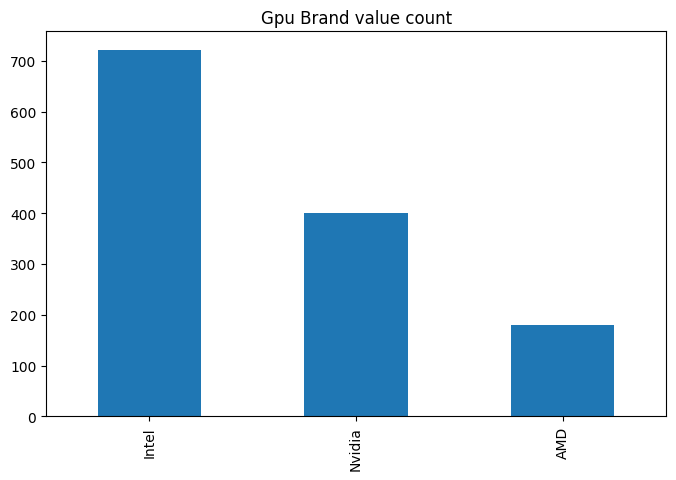

In [85]:
plt.figure(figsize=(8,5))
laptops_df["Gpu Brand"].value_counts().sort_values(ascending=False).plot.bar()
plt.title("Gpu Brand value count")
plt.show()

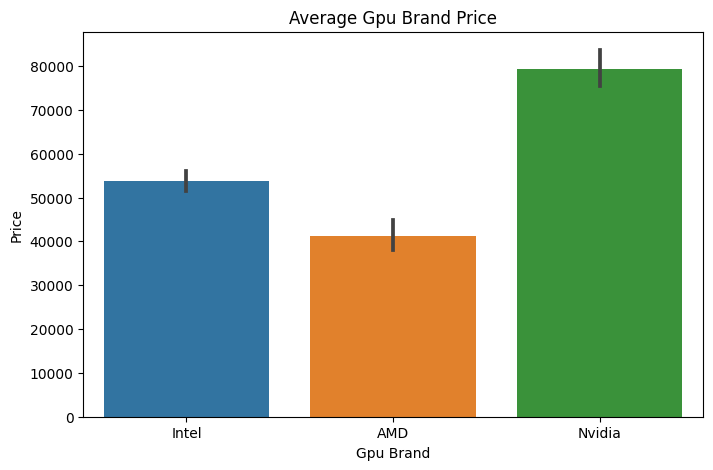

In [86]:
plt.figure(figsize=(8,5))
sns.barplot(data=laptops_df,x="Gpu Brand", y="Price")
plt.title("Average Gpu Brand Price")
plt.show()

Let's drop Gpu column.

In [87]:
laptops_df = laptops_df.drop("Gpu",axis=1)

In [88]:
laptops_df.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Gpu Brand
1294,HP,Notebook,6,Windows 10,2.04,29303.4672,0,0,141.211998,AMD Processor,0,0,AMD
566,Dell,Notebook,4,Windows 10,1.93,51095.5200,0,0,100.454670,Intel Core i5,500,0,Intel
1171,HP,Notebook,16,Windows 10,2.10,61751.5200,0,0,141.211998,Intel Core i7,0,512,Intel
471,HP,Notebook,8,Windows 10,1.90,61485.1200,0,0,141.211998,Intel Core i5,500,0,AMD
252,Asus,Notebook,4,Windows 10,1.68,24988.3200,0,0,100.454670,AMD Processor,1000,0,AMD


Let's work with Operating System column.

In [89]:
laptops_df["OpSys"].value_counts().sort_values(ascending=False)

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [90]:
# extract os
def extract_os(text):
    if text == "Windows 10" or text == "Windows 7" or text == "Windows 10 S":
        return "Windows"
    elif text == "macOS" or text == "Mac OS X":
        return "Mac"
    elif text == "Linux" :
        return "Linux"
    else :
        return "Others/No OS"

In [91]:
laptops_df["OS"]=laptops_df["OpSys"].apply(extract_os)

In [92]:
laptops_df["OS"].value_counts().sort_values(ascending=False)

Windows         1125
Others/No OS      94
Linux             62
Mac               21
Name: OS, dtype: int64

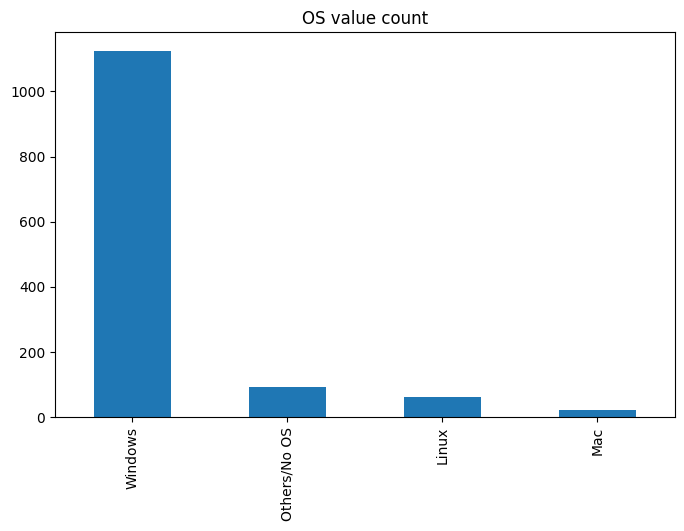

In [93]:
plt.figure(figsize=(8,5))
laptops_df["OS"].value_counts().sort_values(ascending=False).plot.bar()
plt.title("OS value count")
plt.show()

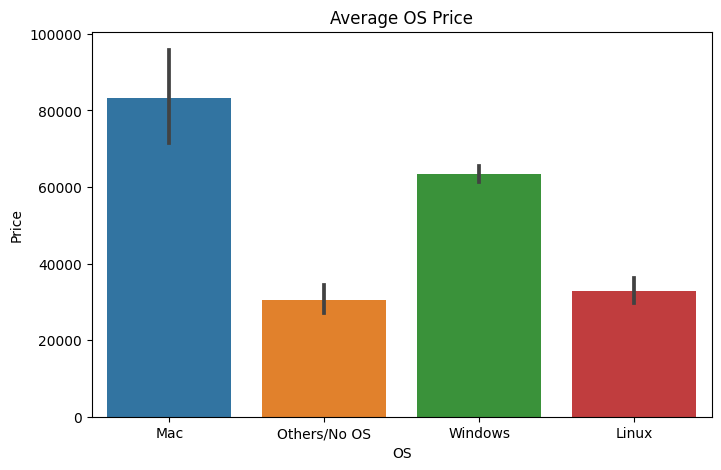

In [94]:
plt.figure(figsize=(8,5))
sns.barplot(data=laptops_df,x="OS", y="Price")
plt.title("Average OS Price")
plt.show()

In [95]:
# drop Operating System column
laptops_df = laptops_df.drop("OpSys",axis = 1)

In [96]:
laptops_df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Gpu Brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [97]:
laptops_df.corr()["Price"].sort_values(ascending=False)

/var/folders/kl/b_7s360d6_95c12zywr6p0000000gn/T/ipykernel_14219/3100307148.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  laptops_df.corr()["Price"].sort_values(ascending=False)


Price          1.000000
Ram            0.742905
SSD            0.670660
PPI            0.475368
IPS            0.253320
Weight         0.209867
Touchscreen    0.192917
HDD           -0.096891
Name: Price, dtype: float64

Let's explore Weight column.

In [98]:
laptops_df["Weight"].value_counts()

2.20    126
2.10     58
2.00     45
2.40     44
2.30     41
       ... 
4.50      1
1.14      1
3.80      1
2.26      1
2.34      1
Name: Weight, Length: 171, dtype: int64

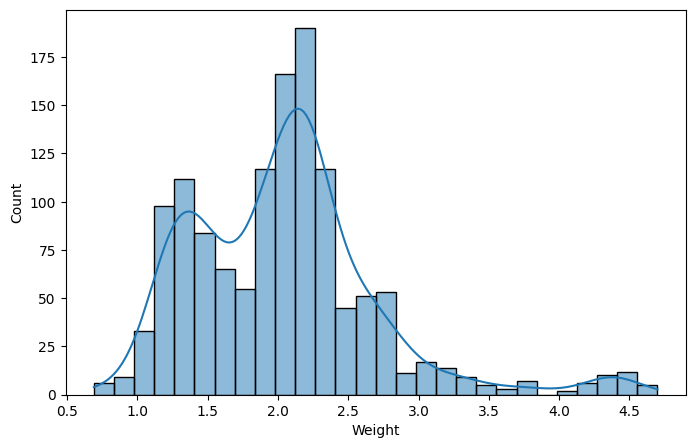

In [99]:
plt.figure(figsize=(8,5))
sns.histplot(data=laptops_df, x = "Weight",kde=True)
plt.show()

Bimodal distribution.

/var/folders/kl/b_7s360d6_95c12zywr6p0000000gn/T/ipykernel_14219/3873599852.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(laptops_df.corr(),vmin=-1,vmax=1,cmap="RdBu")


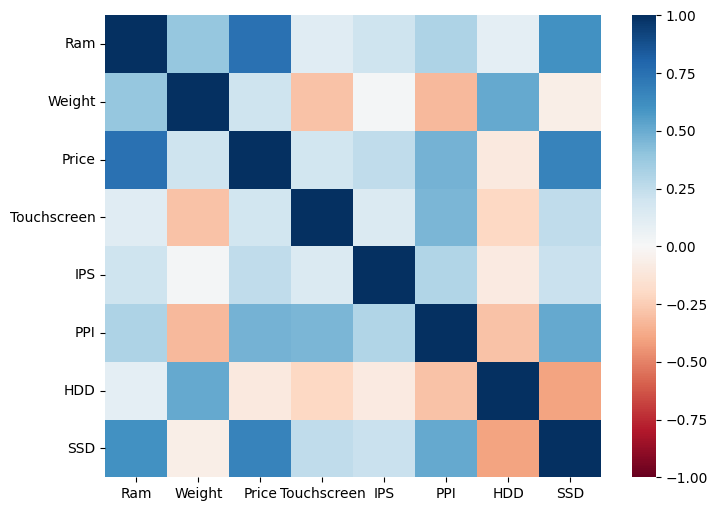

In [100]:
# heatmap
plt.figure(figsize=(8,6))
sns.heatmap(laptops_df.corr(),vmin=-1,vmax=1,cmap="RdBu")
plt.show()

Let's explore Price column.

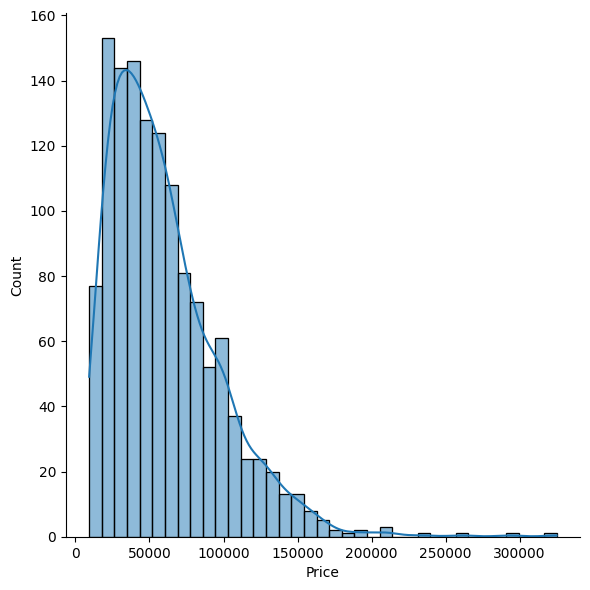

In [101]:
sns.displot(data=laptops_df,x="Price",kde=True,height=6)

The Price distribution is skewed. Let's treat it with log transformation.

In [102]:
# log transformation
laptops_df["Price"] = np.log(laptops_df["Price"])
laptops_df["Price"].head()

0    11.175755
1    10.776777
2    10.329931
3    11.814476
4    11.473101
Name: Price, dtype: float64

Inverse of log operation is exponential, which will give us the original price.

In [106]:
np.exp(11.175755)

71378.71538254821

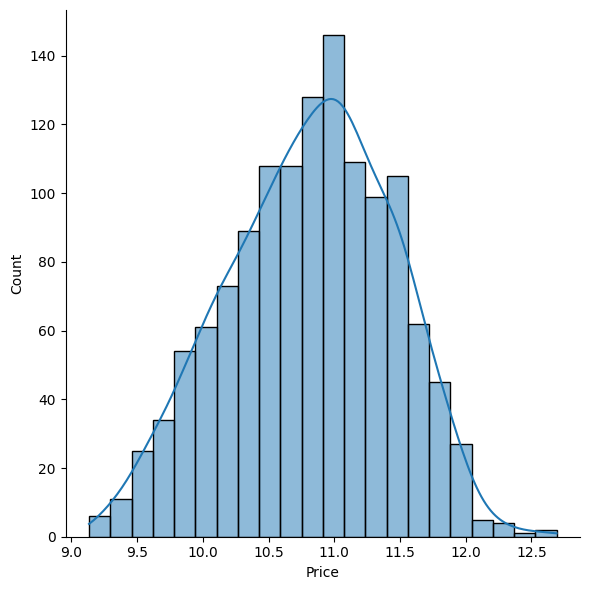

In [103]:
sns.displot(data=laptops_df,x="Price",kde=True,height=6)

# MODELLING

In [104]:
# Features & Target
X = laptops_df.drop("Price",axis=1)
y = laptops_df["Price"]

#### TRAIN TEST SPLIT

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

#### COLUMN TRANSFORMER

In [115]:
step1 = ColumnTransformer([("col_tnf", OneHotEncoder(sparse=False,drop="first"),[0,1,7,10,11])],\
                          remainder="passthrough")

step2 = LinearRegression()

pipe = Pipeline([
    ("step1",step1),
    ("step2",step2)
])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

In [118]:
print(f"R2 Score : {r2_score(y_test,y_pred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test,y_pred))}")

R2 Score : 0.8123288726010081
RMSE : 0.25063856584116445
